Les graphes seront représentés avec Networkx, l’affichage avec Matplotlib et les graphes peuvent être généré de manière aléatoire

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time

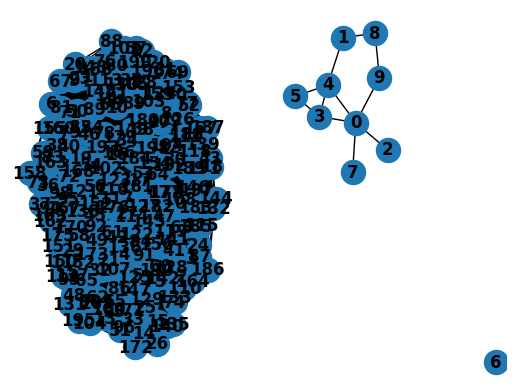

In [10]:
# Create a random graph
G1 = nx.gnp_random_graph(200, 0.5, directed=False)
# Create a random graph with sub graph left alone
G2 = nx.gnp_random_graph(10, 0.2, directed=False)

# Draw the graphs
plt.subplot(1,2,1)
nx.draw(G1, with_labels=True, font_weight='bold')
plt.subplot(1,2,2)
nx.draw(G2, with_labels=True, font_weight='bold')
plt.show()

In [4]:
"""
fonction recherche_clique(graphe G):
    n = nombre de sommets de G
    taille_max_clique = 0
    clique_max = ensemble vide
    pour chaque sous-ensemble S de sommets de G:
    si la taille de S > taille_max_clique et est_clique(G, S):
    taille_max_clique = taille de S
    clique_max = S
    retourner clique_max
fonction est_clique(graphe G, ensemble S):
    pour chaque paire de sommets v, w dans S:
        si v n'est pas adjacent à w dans G:
            retourner faux
    retourner vrai

"""
def est_clique(G, S):
    for v in S:
        for w in S:
            if v != w and not G.has_edge(v, w):
                return False
    return True

def recherche_clique(G):
    n = G.number_of_nodes()
    taille_max_clique = 0
    clique_max = set()
    for i in range(2**n):
        S = set()
        for j in range(n):
            if (i >> j) & 1:
                S.add(j)
        if len(S) > taille_max_clique and est_clique(G, S):
            taille_max_clique = len(S)
            clique_max = S
    return clique_max

In [5]:
recherche_clique(G1)

KeyboardInterrupt: 

In [11]:
def bronKerbosch1(R, P, X, G, res = []):
    """Algorithme de Bron-Kerbosch pour trouver les cliques d'un graphe."""
    if len(P) == 0 and len(X) == 0:
        res.append(R)
    for v in P.copy():
        bronKerbosch1(R.union({v}), P.intersection(set(G.neighbors(v))), X.intersection(set(G.neighbors(v))), G, res=res)
        P.remove(v)
        X.add(v)
    return res

def bronKerbosch2(R, P, X, G):
    """Algorithme de Bron-Kerbosch pivot pour trouver les cliques d'un graphe."""
    if len(P) == 0 and len(X) == 0:
        print(R)
    else:
        u = P.union(X).pop()
        for v in P.difference(set(G.neighbors(u))):
            bronKerbosch2(R.union({v}), P.intersection(set(G.neighbors(v))), X.intersection(set(G.neighbors(v))), G)
            P.remove(v)
            X.add(v)

def bronKerbosch3(G):
    """Algorithme de Bron-Kerbosch pivot et dégénérescence pour trouver les cliques d'un graphe."""
    P = set(G.nodes())
    X = set()
    R = set()
    for v in sorted(G.nodes(), key=lambda v: G.degree(v), reverse=True):
        bronKerbosch2(R.union({v}), P.intersection(set(G.neighbors(v))), X.intersection(set(G.neighbors(v))), G)
        P.remove(v)
        X.add(v)

In [12]:
R = set()
P = set(G1.nodes())
X = set()
start = time.time()
bronKerbosch1(R, P, X, G1)
end = time.time()
print("Time elapsed:", end - start)

Time elapsed: 45.1958270072937


In [109]:
bronKerbosch3(G1)

{0, 1, 4, 9}
{0, 1, 2}
{1, 3}
{1, 5}
{0, 2, 7}
{8, 2}
{2, 6}
{8, 3}
{3, 6}
{3, 7}
{8, 4}
{5, 7}
